# Assignment 2 : Linear Regression Model

### Author : Atharv Subhekar
###CWID : 20015840

In [44]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Data Preprocessing

In [45]:
# Loading the dataset
data = np.genfromtxt("data2.txt", delimiter =',')
print("n x f matrix of training data :",data.shape)

n x f matrix of training data : (97, 2)


In [46]:
# Separating features and target
X = data[:,0]
y = data[:,1]
print("Length of X = ",len(X))
print("Length of y = ",len(y))

Length of X =  97
Length of y =  97


### 1. Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)




<ipython-input-47-029970b4ecd3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


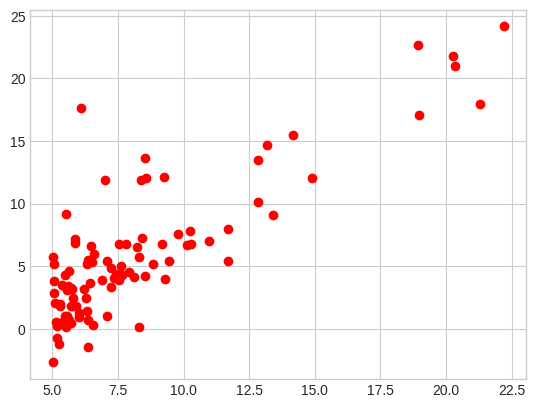

In [47]:
# Plotting the data
plt.style.use('seaborn-whitegrid')
plt.plot(X,y,'ro')

### 2. Normal Equation

The normal equation for linear regression model using MSE.


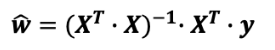

In [48]:
# Function for normal equation

def normal_equation(X, y):
  X_transpose = np.transpose(X)
  X_Xtranspose = np.dot(X_transpose, X)
  y_Xtranspose = np.dot(X_transpose, y)

  w = np.linalg.solve(X_Xtranspose, y_Xtranspose)

  return w

In [49]:
# Add a column of ones to X for the intercept term
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
# Calculating coefficients using normal equation
w = normal_equation(X_with_intercept,y)
print("Coefficients", w)

Coefficients [-3.89578088  1.19303364]


### 3. Gradient Descent using batch AND stochastic modes respectively

a. Splitting the dataset into training and testing set. (80% Training and 20% Testing)

In [50]:
# Splitting the dataset into training and testing as required.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print("X_train = ",len(X_train))
print("y_train = ",len(y_train))
print("X_test = ",len(X_test))
print("y_test = ",len(y_test))

X_train =  77
y_train =  77
X_test =  20
y_test =  20


b. Plot MSE vs. iteration of each mode for both training set and testing set (i.e., batch – training
and testing; stochastic – training and testing).


#### Batch Gradient Descent.
In Gradient descent we calculate the mean squared error over all the data samples all together. Hence we take the average over the total number of elements.


In [51]:
def MSE_gd(y_true , y_pred):
  # Calculating cost
  cost = np.sum((y_true - y_pred)**2) / len(y_true)
  return cost


In [55]:
def gradient_descent(X_train,y_train, X_test, y_test, iterations = 100, learning_rate = 0.0001, stopping_threshold = 1e-3):
  # initializing weight, bias, iterations and learning rate
  current_weight = 0.1
  current_bias = 0.01
  iterations = iterations
  learning_rate = learning_rate
  n = float(len(X_train))

  # Initializing storage for cost
  training_costs = []
  testing_costs = []

  previous_cost = None
  # Creating a list for plotting MSE vs iterations
  iter = []
  # Estimation of parameters
  for i in range(iterations):
    iter.append(i)
    # Predictions
    y_pred_train = (current_weight * X_train) + current_bias
    # Calculating current cost
    current_cost = MSE_gd(y_train, y_pred_train)
    # Stopping gradient descent when the difference between current cost and previous cost is less than threshold
    if previous_cost and abs(previous_cost-current_cost) <= stopping_threshold:
      break
    # Updating the cost and weight
    previous_cost = current_cost
    training_costs.append(current_cost)
    # Calculating the gradient
    delta_weight = (2/n) * np.sum(X_train * (y_train - y_pred_train))
    delta_bias = (2/n) * np.sum(y_train - y_pred_train)
    # Updating the weights
    current_weight = current_weight + (learning_rate * delta_weight)
    current_bias = current_bias + (learning_rate * delta_bias)
    # Predicting on testing data
    y_pred_test = (current_weight * X_test) + current_bias
    # MSE for testing predictions
    current_cost_test = MSE_gd(y_test, y_pred_test)
    # Storing testing cost
    testing_costs.append(current_cost_test)
  #print('Iterations required to converge - %d with learning rate - %f'%(len(iter),learning_rate))
  return current_weight, current_bias, training_costs, testing_costs, iter



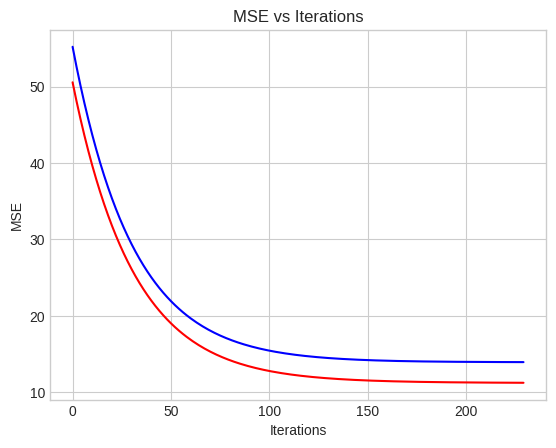

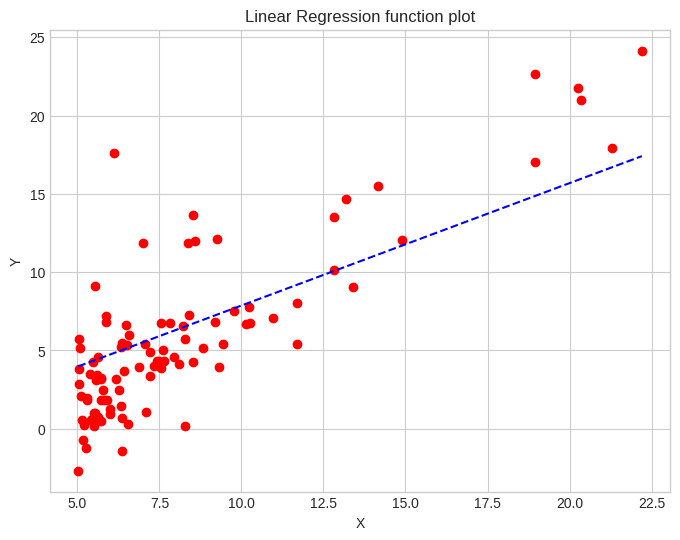

In [56]:
# Estimating weight and bias using gradient descent using the training data
estimated_weight, estimated_bias, training_costs, testing_costs, iter = gradient_descent(X_train, y_train, X_test, y_test, iterations=1000)
# Plotting MSE vs Iterations
plt.title('MSE vs Iterations')
plt.plot(np.arange(len(training_costs)), training_costs, label='Training', color = 'red')
plt.plot(np.arange(len(testing_costs)), testing_costs, label='Testing', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('MSE')
# Making predictions using estimated parameters
y_pred = estimated_weight*X + estimated_bias
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.title('Linear Regression function plot')
plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

After plotting the MSE vs Iteration curve for Batch Gradient descent we can see that the global optimum is converged in 231 interations. Also in batch gradient descent, since it considers all the samples to calculate the MSE and udpate the gradient, the curve is smooth and covereges to a local optima which is the global optima in this case.
Batch gradient descent might converge to a local minimum depending on the data.This issue can be addressed using regularized linear models.

The best learning rate would be the one which converges with least number of iterations. Hence, using 0.01 learning rate for Batch Gradient Descent would.

### Stochastic Gradient Descent
In stochastic gradient descent we consider one random sample at a time, calculate it's MSE and then calculate the gradient.
Since we are using one sample at time, the code ran into as issue with the MSE function used above. A separate MSE function is used for Stochastic Gradient Descent.

In [57]:
def MSE_sgd(y_true , y_pred):
  # Calculating cost
  cost = (y_true - y_pred)**2
  return cost

In [58]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, iterations = 100, learning_rate = 0.0001, stopping_threshold = 1e-3):
  # initializing weight, bias, iterations and learning rate
  current_weight = 0.1
  current_bias = 0.1
  iterations = iterations
  learning_rate = learning_rate
  n=1
  # Creating a list for plotting MSE vs iterations
  iter_1 = []

  # Initializing storage for cost
  training_costs = []
  testing_costs = []
  previous_cost = None

  for iter in range(iterations):
    iter_1.append(iter)
    # Shuffle the data
    indices = np.random.permutation(len(X_train))
    for i in indices:
      # Predictions
      y_pred_train = (current_weight * X_train[i]) + current_bias
      # Calculating training cost
      current_cost = MSE_sgd(y_train[i], y_pred_train)

      # Calculating the gradient
      delta_weight = (2/n) * (X_train[i] * (y_train[i]-y_pred_train))
      delta_bias = (2/n) * (y_train[i]-y_pred_train)
      # Updating the weights
      current_weight = current_weight + (learning_rate * delta_weight)
      current_bias = current_bias + (learning_rate * delta_bias)
    # Stopping gradient descent when the difference between current cost and previous cost is less than threshold
    if previous_cost and abs(previous_cost-current_cost) <= stopping_threshold:
      break
    # Updating the cost and weight
    previous_cost = current_cost

    # Predicting on testing data
    y_pred_test = (current_weight * X_test) + current_bias
    # MSE for testing predictions
    current_cost_test = MSE_gd(y_test, y_pred_test)
    # Storing testing cost
    testing_costs.append(current_cost_test)
    # Storing training cost
    training_costs.append(current_cost)
  #print('Iterations required to converge',len(iter_1))
  return current_weight, current_bias, training_costs, testing_costs


Text(0, 0.5, 'Y')

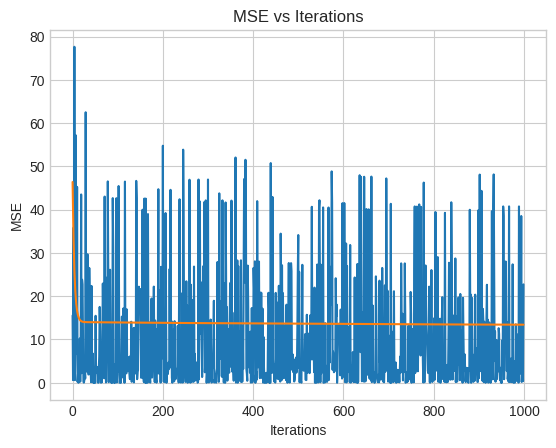

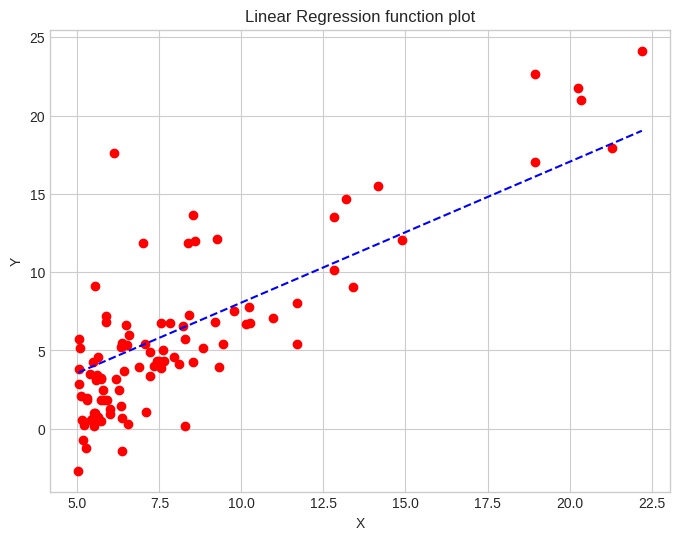

In [59]:
# Estimating weight and bias using gradient descent using the training data
estimated_weight, estimated_bias, training_costs, testing_costs = stochastic_gradient_descent(X_train, y_train, X_test, y_test, learning_rate = 0.00001, iterations=1000, stopping_threshold = 1e-4)

# Plotting the graphs
plt.title('MSE vs Iterations')
plt.plot(np.arange(len(training_costs)), training_costs, label='Training')
plt.plot(np.arange(len(testing_costs)), testing_costs, label='Testing')
#plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('MSE')

# Making predictions using estimated parameters
y_pred = estimated_weight*X_train + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.title('Linear Regression function plot')
plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")

After plotting MSE vs iterations, we can see that the gradient is calculated at random samples. The gradient is calculate for every samples using the MSE.
Since random samples are picked at time the plot seems very irratic and takes more iterations to converge as compared to Batch Gradient Descent. Also Stochastic Gradient Descent is very sensitive to learning rate and the plot changes drastically with small variations in the learning rate.

This issue can be solved using variable learning rate. By using momentum we can calculate an optimal learning rate for every randomly picked sample.

##### Plotting the graph for different learning rates.

As we can see stochastic gradient descent is sensitive to learning rate and very difficult to optimize. The gradient mostly shoots past the global minimum after calculating. The best learning rate from the main plot is 0.00001.

In [78]:
learning = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
testing_MSE_BGD = []
for i in learning:
  # Estimating weight and bias using gradient descent using the training data
  estimated_weight, estimated_bias, training_costs, testing_costs, iter = gradient_descent(X_train, y_train, X_test, y_test,learning_rate = i, iterations=1000)
  testing_MSE_BGD.append(testing_costs[-1])

In [80]:
learning = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
testing_MSE_SGD = []
for i in learning:
  # Estimating weight and bias using gradient descent using the training data
  estimated_weight, estimated_bias, training_costs, testing_costs = stochastic_gradient_descent(X_train, y_train, X_test, y_test,learning_rate = i, iterations=1000)
  testing_MSE_SGD.append(testing_costs[-1])

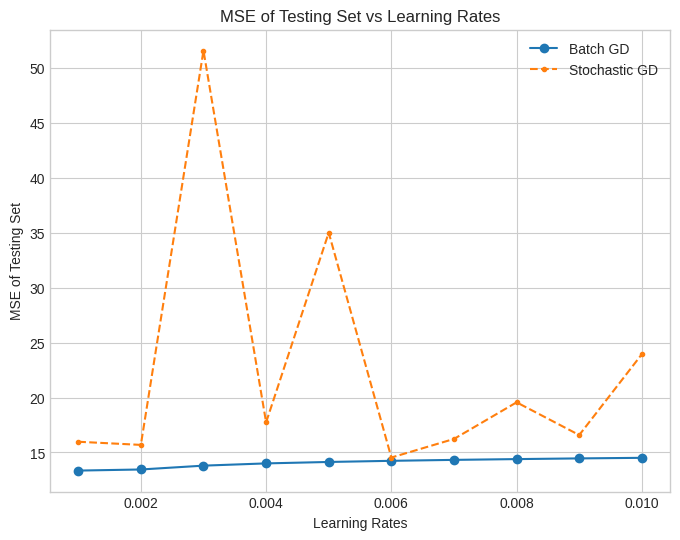

In [82]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(learning, testing_MSE_BGD, marker='o', linestyle='-', label='Batch GD')
plt.plot(learning, testing_MSE_SGD, marker='.', linestyle='--', label='Stochastic GD')
plt.xlabel('Learning Rates')
plt.ylabel('MSE of Testing Set')
plt.title('MSE of Testing Set vs Learning Rates')
plt.legend()
plt.show()

In [83]:
# Find the best learning rate
best_lr_bgd = learning[np.argmin(testing_MSE_BGD)]
best_mse_bgd = min(testing_MSE_BGD)

best_lr_sgd = learning[np.argmin(testing_MSE_SGD)]
best_mse_sgd = min(testing_MSE_SGD)

print('Batch Gradient Descent: Best Learning Rate = {}, Best MSE = {}'.format(best_lr_bgd, best_mse_bgd))
print('Stochastic Gradient Descent: Best Learning Rate = {}, Best MSE = {}'.format(best_lr_sgd, best_mse_sgd))

Batch Gradient Descent: Best Learning Rate = 0.001, Best MSE = 13.353045274875644
Stochastic Gradient Descent: Best Learning Rate = 0.006, Best MSE = 14.539433622362186


### Mini Batch Gradient Descent
To verify the plots for Gradient Descent and Stochastic Gradient Descent, I also tried using Mini Batch Gradient descent where I can specify the size of the batches and see how it affects the MSE vs iterations plot.

In [60]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, iterations = 100,learning_rate = 0.0002, stopping_threshold = 1e-3, batch_size = 50):
  # initializing weight, bias, iterations and learning rate
  current_weight = 0.1
  current_bias = 0.1
  iterations = iterations
  learning_rate = learning_rate
  batch_size = batch_size

  # Storing list
  training_costs = []
  testing_costs = []
  for iter in range(iterations):
    indices = np.random.permutation(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]

    for i in range(0, len(X_train), batch_size):
      X_batch = X_train[i:i+batch_size]
      y_batch = y_train[i:i+batch_size]
      n = batch_size
      # Predictions
      y_pred = (current_weight * X_batch) + current_bias
      # Calculating current cost
      current_cost = MSE_gd(y_batch, y_pred)
      # Calculating the gradient
      delta_weight = (2/n) * np.sum(X_batch * (y_batch - y_pred))
      delta_bias = (2/n) * np.sum(y_batch - y_pred)
      # Updating the weights
      current_weight = current_weight + (learning_rate * delta_weight)
      current_bias = current_bias + (learning_rate * delta_bias)
    # Updating training cost
    training_costs.append(current_cost)

    # Predicting on testing data
    y_pred_test = (current_weight * X_test) + current_bias
    # MSE for testing predictions
    current_cost_test = MSE_gd(y_test, y_pred_test)
    # Storing testing cost
    testing_costs.append(current_cost_test)
  return current_weight, current_bias, training_costs, testing_costs

Text(0, 0.5, 'Y')

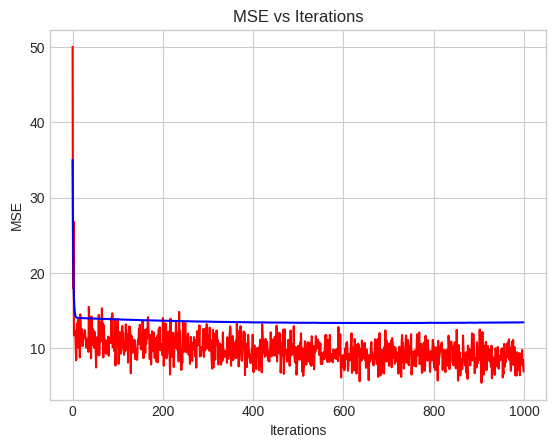

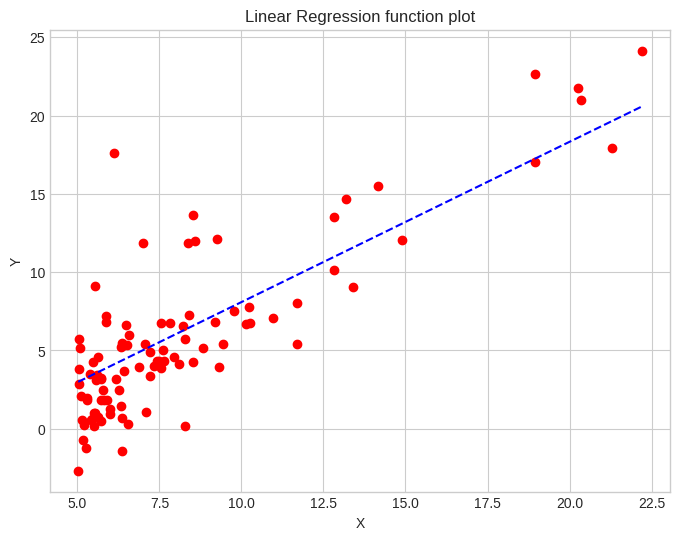

In [61]:
# Estimating weight and bias using gradient descent using the training data
estimated_weight, estimated_bias, training_costs, testing_costs = mini_batch_gradient_descent(X_train, y_train, X_test, y_test, iterations=1000, learning_rate = 0.001, batch_size = 40)
# Plotting MSE vs Iterations
plt.title('MSE vs Iterations')
plt.plot(np.arange(len(training_costs)), training_costs, label='Training', color = 'red')
plt.plot(np.arange(len(testing_costs)), testing_costs, label='Testing', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('MSE')

# Making predictions using estimated parameters
y_pred = estimated_weight*X_train + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.title('Linear Regression function plot')
plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")

After plotting the MSE vs iterations curve we can see that the smoothness of the plot changes depending on the size of the batch. Bigger the batch size, smoother is the curve and less sensitive is the model to learning rate.

The optimal batch size I felt was 40 since it calculate the gradient for each batch separately and re iterates making it better than Gradient Descent in terms of accuracy but not better than Stochastic Gradient Descent